In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/MyDrive/Housing.csv", sep=',')
df

Mounted at /content/drive


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.isnull().sum().sum()

np.int64(0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df['mainroad'].value_counts()

,count
mainroad,
yes,468
no,77


In [6]:
df['mainroad']=df['mainroad'].map({'yes':1, 'no':0})
df['guestroom']=df['guestroom'].map({'yes':1, 'no':0})
df['basement']=df['basement'].map({'yes':1, 'no':0})
df['hotwaterheating']=df['hotwaterheating'].map({'yes':1, 'no':0})
df['airconditioning']=df['airconditioning'].map({'yes':1, 'no':0})
df['prefarea']=df['prefarea'].map({'yes':1, 'no':0})
df['furnishingstatus']=df['furnishingstatus'].astype('category')

In [7]:
df.nunique()

,0
price,219
area,284
bedrooms,6
bathrooms,4
stories,4
mainroad,2
guestroom,2
basement,2
hotwaterheating,2
airconditioning,2


In [8]:
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished
108,6107500,3240,4,1,3,1,0,0,0,0,1,0,semi-furnished
226,4690000,5170,3,1,4,1,0,0,0,1,0,0,semi-furnished
34,8120000,6840,5,1,2,1,1,1,0,1,1,0,furnished
47,7490000,6600,3,1,4,1,0,0,0,1,3,1,furnished


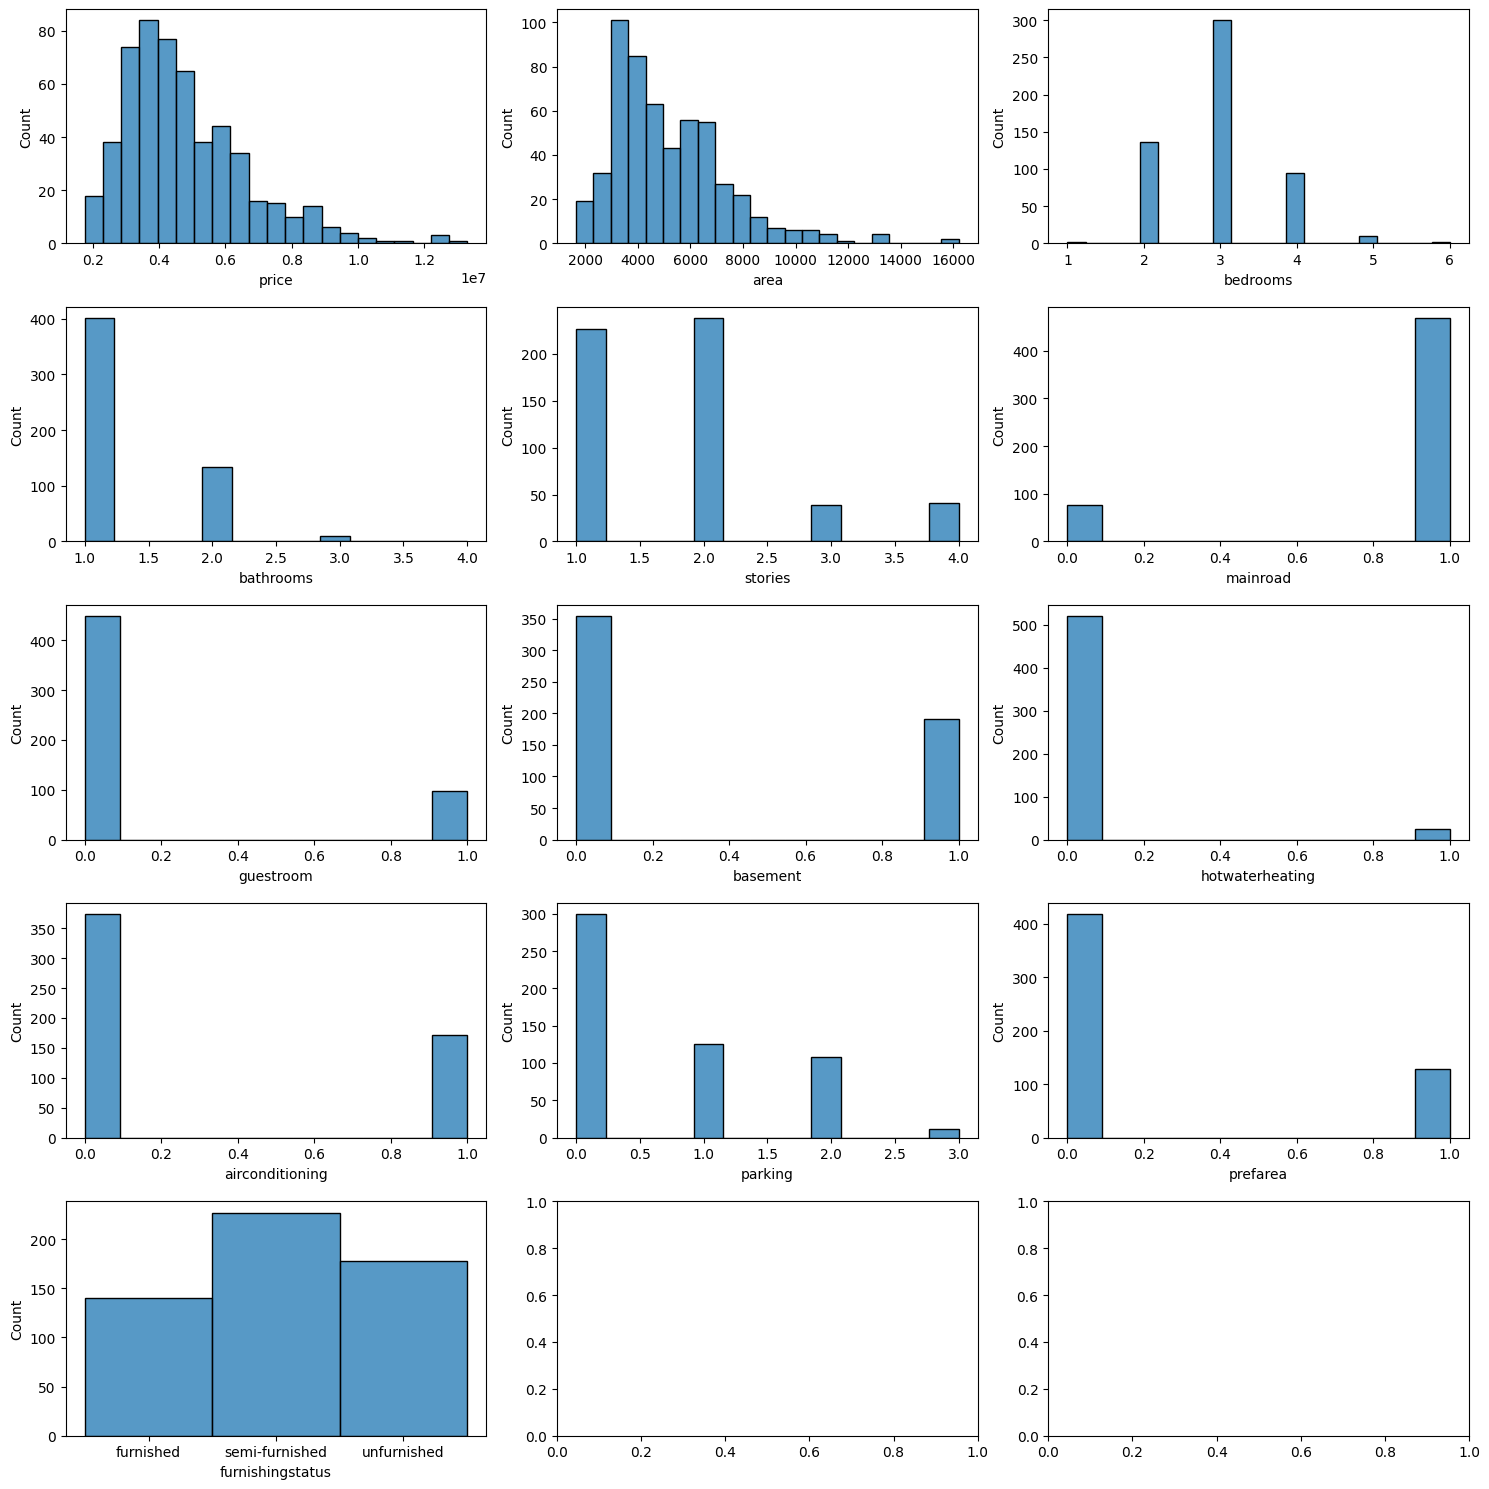

In [9]:
cols_num=['price','area',	'bedrooms',	'bathrooms','stories','mainroad','guestroom',	'basement',	'hotwaterheating',
          'airconditioning',	'parking',	'prefarea',	'furnishingstatus']
fig, axes=plt.subplots(5,3, figsize=(15,15))
for i, column in enumerate(cols_num):
  sns.histplot(df[column], ax=axes[i//3, i%3], kde=False)
plt.tight_layout()
plt.show()

In [10]:
df.groupby(['furnishingstatus']).median().T

/tmp/ipython-input-10-3458809154.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['furnishingstatus']).median().T


furnishingstatus,furnished,semi-furnished,unfurnished
price,5075000.0,4585000.0,3430000.0
area,5800.0,4600.0,4075.0
bedrooms,3.0,3.0,3.0
bathrooms,1.0,1.0,1.0
stories,2.0,2.0,1.5
mainroad,1.0,1.0,1.0
guestroom,0.0,0.0,0.0
basement,0.0,0.0,0.0
hotwaterheating,0.0,0.0,0.0
airconditioning,0.0,0.0,0.0


In [11]:
df.groupby(['bedrooms']).median(numeric_only='numbers').T

bedrooms,1,2,3,4,5,6
price,2712500.0,3535000.0,4620000.0,5250000.0,5582500.0,4791500.0
area,3710.0,4036.0,4830.0,5400.0,5350.0,3950.0
bathrooms,1.0,1.0,1.0,2.0,2.0,1.5
stories,1.0,1.0,2.0,2.0,2.0,2.0
mainroad,0.5,1.0,1.0,1.0,1.0,1.0
guestroom,0.0,0.0,0.0,0.0,0.0,0.0
basement,0.0,0.0,0.0,0.0,1.0,0.0
hotwaterheating,0.0,0.0,0.0,0.0,0.0,0.0
airconditioning,0.0,0.0,0.0,0.0,0.0,0.0
parking,0.0,0.0,0.0,1.0,0.0,0.5


In [12]:
dummies=pd.get_dummies(df['furnishingstatus'])
dummies= dummies.astype(int)
df= pd.concat([df.drop('furnishingstatus', axis=1), dummies], axis=1)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [13]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.229350,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.145772,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.079054,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.108139,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.093176,-0.003648,-0.082972
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.129971,0.011450,-0.133123
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.099721,0.005821,-0.099023
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.069852,0.050284,-0.117935
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.008472,0.063819,-0.059194
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.160994,-0.053179,-0.094086


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x=df.drop('price', axis=1)
y=df['price']
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [15]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=1)
regression_model=LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [16]:
regression_model.score(x_train, y_train)

0.6812367200088842

In [17]:
regression_model.score(x_test, y_test)

0.664629853985242

In [23]:
y_pred=regression_model.predict(x_test) #modelo de prediccion
df_preds = pd.DataFrame({'Real': y_test.squeeze(), 'Predicted': y_pred.squeeze()}) #comparacion en df
df_preds

,Real,Predicted
62,7070000,6.230049e+06
247,4550000,6.329791e+06
142,5600000,6.600961e+06
107,6125000,5.513264e+06
483,2940000,4.306170e+06
...,...,...
450,3150000,4.071955e+06
542,1750000,2.670559e+06
408,3430000,2.764433e+06
80,6629000,5.755530e+06


In [24]:
#medidas del modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae=mean_absolute_error(y_test, y_pred) #suma abs de las diferencias
mse=mean_squared_error(y_test, y_pred) #suma al cuadrado
rmse=np.sqrt(mse) #raiz de la suma abs de las diferencias al cuadrado
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 852334.01
Mean squared error: 1365102766597.07
Root mean squared error: 1168376.12


In [26]:
#coeficientes de la ecuacion
for idx, col_name in enumerate(x_train.columns):
  print("Coeficiente {} = {}".format(col_name, regression_model.coef_[idx]))

Coeficiente area = 247.0359902897455
Coeficiente bedrooms = 40846.30218778481
Coeficiente bathrooms = 1021139.5494280473
Coeficiente stories = 525832.0645598542
Coeficiente mainroad = 470516.85396633006
Coeficiente guestroom = 274402.8481645412
Coeficiente basement = 547653.8340933515
Coeficiente hotwaterheating = 817377.0748239504
Coeficiente airconditioning = 614433.3280215568
Coeficiente parking = 273070.4836520503
Coeficiente prefarea = 510839.7535387111
Coeficiente furnished = 154371.85860030592
Coeficiente semi-furnished = 87343.89789588941
Coeficiente unfurnished = -241715.75649619513


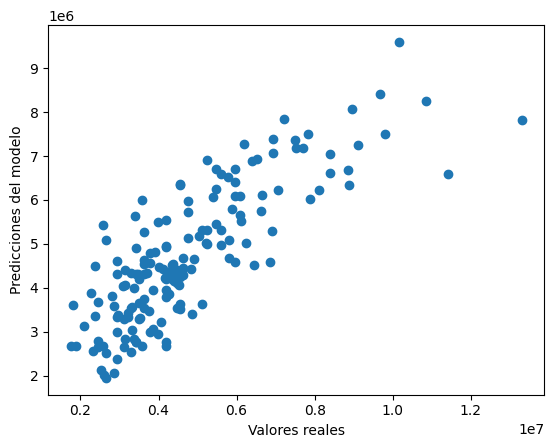

In [38]:
predictions= regression_model.predict(x_test)
plt.scatter(y_test, predictions)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones del modelo')
plt.show()

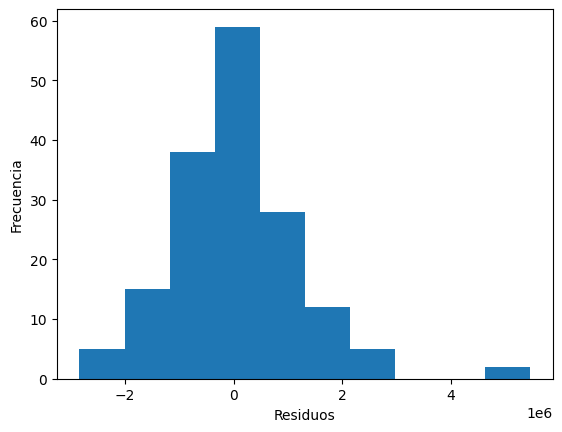

In [39]:
plt.hist(y_test-predictions)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

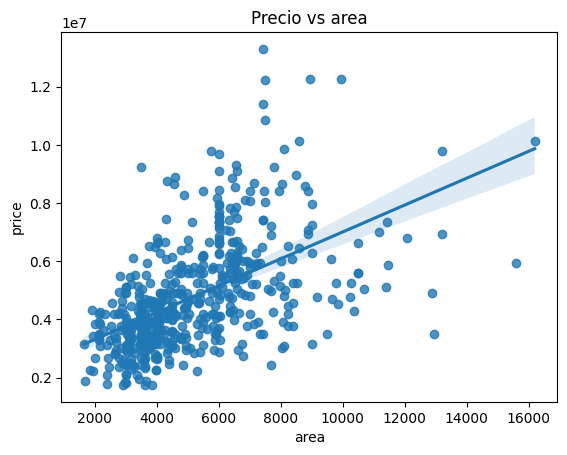

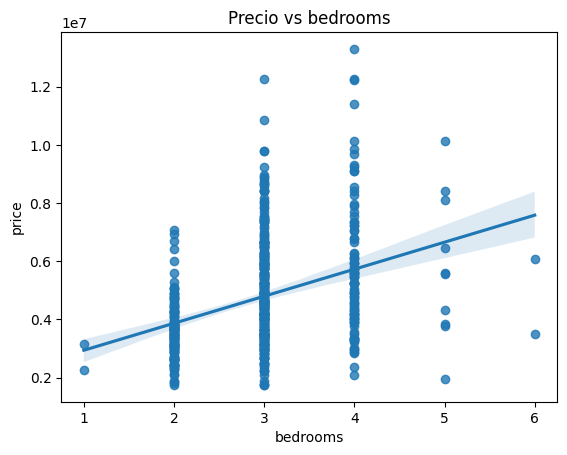

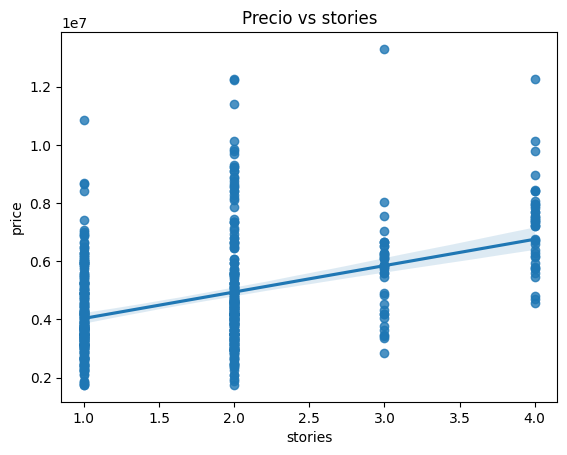

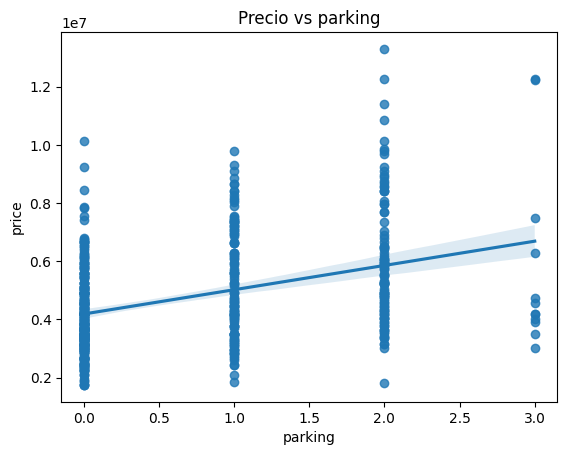

In [40]:
#varibles de area en comparacion con el precio
import seaborn as sns
variables=['area','bedrooms','stories','parking']
for var in variables:
  plt.figure()
  sns.regplot(x=var, y='price', data=df).set_title(f'Precio vs {var}')
  plt.show()